In [1]:
#dataset = titanic

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read the dataset
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analyasis

Step 1: Missing data

In [7]:
#use seaborn to create a simple heatmap to see where we are missing data
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:>

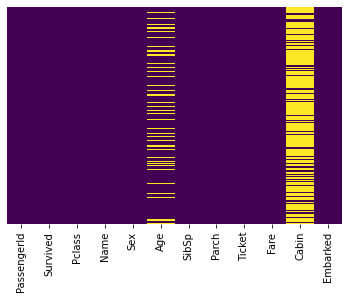

In [9]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

Roughly conclude that 20 percent of age data is missing. The proposrtion of Age missing likely small. Cabin cloumn missing too much of data, probably we will drop cabin column.


<AxesSubplot:xlabel='Survived', ylabel='count'>

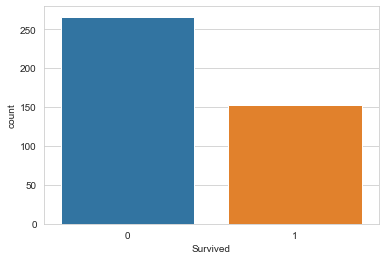

In [12]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

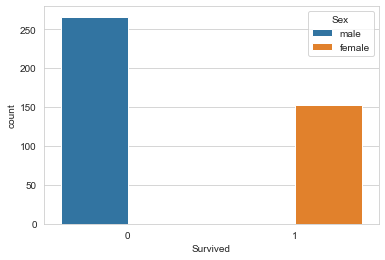

In [13]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived',hue = 'Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

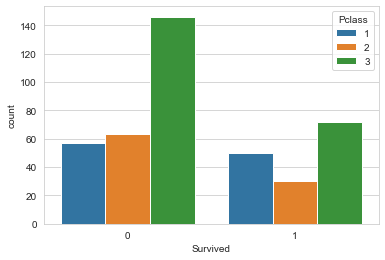

In [14]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived',hue = 'Pclass',data=df)

<AxesSubplot:xlabel='Age'>

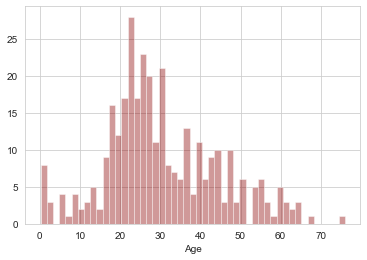

In [22]:
#distribution of Age
sns.distplot(df['Age'].dropna(),kde=False,color = 'darkred',bins =49)

<AxesSubplot:>

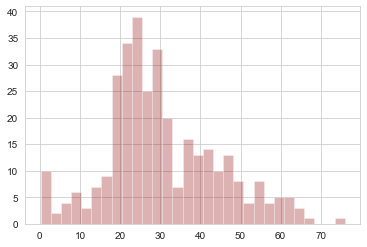

In [27]:
df['Age'].hist(bins = 30,color = 'darkred',alpha = 0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

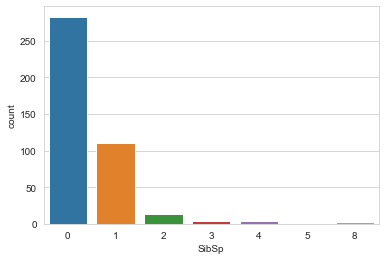

In [29]:
sns.countplot(x = 'SibSp',data = df)

<AxesSubplot:>

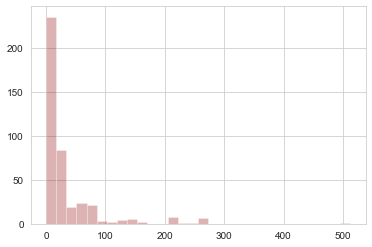

In [30]:
df['Fare'].hist(bins = 30,color = 'darkred',alpha = 0.3)

# Data Cleaning
to fill missing age data instead of just dropping the missing age rows.one way to do this is by filling in the means age of all the passengers.
check average age by passenger class


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

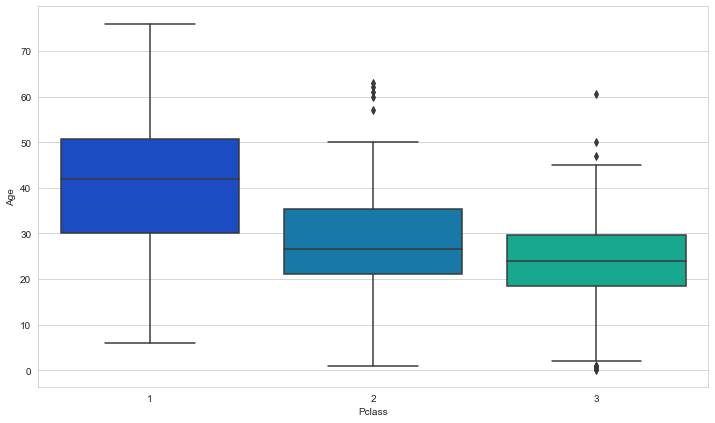

In [32]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data = df, palette='winter')

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass ==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age
    

In [34]:
#Apply function
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)


<AxesSubplot:>

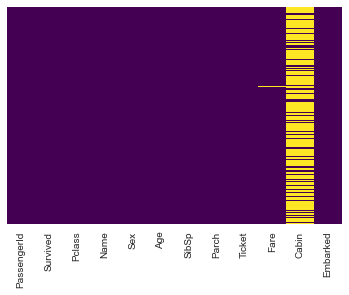

In [36]:
#check the heat map
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')
# Age column disappear

In [37]:
df.drop('Cabin',axis =1,inplace= True)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [39]:
df.dropna(inplace = True)

<AxesSubplot:>

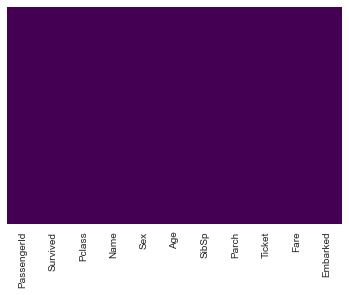

In [40]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

# Converting Categorical Features
convert categorical feature to dummy variables using pandas! 


In [41]:
#dummy variables:A dummy variable (aka, an indicator variable) is a numeric
#variable that represents categorical data, such as gender, race, political affiliation, etc. 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [43]:
#converting to dummy variables
pd.get_dummies(df['Embarked'],drop_first = True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [44]:
sex = pd.get_dummies(df['Sex'],drop_first = True)

In [45]:
Embark = pd.get_dummies(df['Embarked'],drop_first = True)

In [46]:
#drop ['Sex','Embarked','Name','Ticket'] columns
df.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [49]:
# adding sex,Embark in df
df = pd.concat([df,sex,Embark], axis = 1)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


# Logistic Regression


In [51]:
#Split into Train and Test data

In [52]:
df.drop('Survived',axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [53]:
df['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [56]:
#Training and predicting

In [57]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()

In [62]:
model.fit(X_train,y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predictions = model.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix= confusion_matrix(y_test,predictions)

In [70]:
confusion_matrix

array([[65,  0],
       [ 0, 61]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_test,predictions)
accuracy

1.0

In [75]:
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [76]:
from sklearn.metrics import classification_report


In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

